In [8]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(29)

In [9]:
## Set the number of trials 

n_trials = 10_000
n_rows = 10_000

## Roll three dice

n_dice = 3 
n_cols = 3


# Use np's random choice
# Select from [1, 2, 3, 4, 5, 6]

rolls = np.random.choice([1, 2, 3, 4, 5, 6], n_trials * n_dice).reshape(n_rows, n_cols)


rolls

array([[6, 4, 5],
       [6, 3, 1],
       [1, 2, 2],
       ...,
       [6, 2, 1],
       [3, 4, 3],
       [4, 2, 4]])

In [12]:
# Find the sum of each dice roll
# Sum with axis = 1
sum_by_trial = rolls.sum(axis = 1)

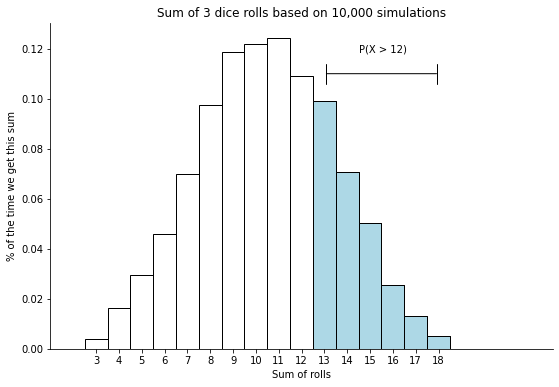

In [13]:
viz.simulation_example1(sum_by_trial)

In [14]:
# check the condition > 12
wins = sum_by_trial > 12

In [15]:
wins

array([ True, False, False, ..., False, False, False])

In [16]:
# Set win array to integers (0 or 1)
# find the mean to find the proportion of wins
win_rate = wins.astype(int).mean()

In [18]:
win_rate
print(f'The player is expected to win {win_rate * 100}% of the time.')

The player is expected to win 26.33% of the time.


In [19]:
# Calculate expected winnings
expected_winnings = win_rate * 15

# Account for the price of the game 
cost = 5

# Profit 
expected_profit = expected_winnings - cost


In [20]:
expected_profit

-1.0505000000000004

#### What happens if you change the winning conditions of the game

In [ ]:
### A win is greater than OR EQUAL to 12 

In [21]:
wins = sum_by_trial >= 12
win_rate = wins.mean()
expected_winnings = win_rate * 15
cost = 5
expected_profit = expected_winnings - cost

expected_profit

0.5860000000000003

In [22]:
print(f'The player is expected to win {win_rate * 100}% of the time.')

The player is expected to win 37.24% of the time.


In [23]:
# Set the nap probability 

p_nap = 0.3

ndays = ncols = 2

n_simulated_weekends = nrows = 10**5

In [24]:
data = np.random.random((nrows, ncols))

In [25]:
data

array([[0.46762045, 0.70078355],
       [0.18897809, 0.54312897],
       [0.253291  , 0.43836437],
       ...,
       [0.15008559, 0.37577491],
       [0.34690321, 0.58934311],
       [0.97135998, 0.57219933]])

In [26]:
naps = data < p_nap
naps

array([[False, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [False, False],
       [False, False]])

In [27]:
naps.sum(axis = 1)

array([0, 1, 1, ..., 1, 0, 0])

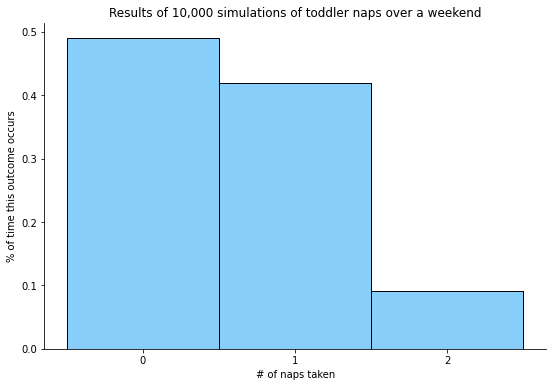

In [28]:
viz.simulation_example2(naps)

In [29]:
# Sum of naps = 1
# Sum of naps = 2
(naps.sum(axis = 1) >= 1).mean()

0.50998

In [30]:
# sum of naps = 0
(naps.sum(axis = 1) == 0).mean()

0.49002

## Use a Data Frame to calculate the results of the simulation

In [32]:
# Number of trials
n_simulations = nrows = 10**5 


# Number of dice rolled 
n_dice_rolled = ncols = 3

# Choose a value from 1 to 6
# Do this 300,000 times

# Arrange into sets of 3
rolls = np.random.choice([1, 2, 3, 4, 5, 6], nrows * ncols).reshape(nrows, ncols)


# Create the data frame

# Use a lambda function to determine if 3 is present in any of the values within a row

# Take the Boolean values produces
(pd.DataFrame(rolls)
 .apply(lambda row: 3 in row.values, axis=1)
 .mean())


0.4212